# 3D plotting function for Black-Jack states

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [12]:
def plot_state_data(tensor, plot_type='wireframe', zrange=(-1, 1)):
    '''
    Plots the state values in 3D
    '''    
    for ua in [0, 1]:
        
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        if plot_type == 'scatter':
            xs = [d for d in range(10) for p in range(10)]
            ys = [p for d in range(10) for p in range(10)]
            zs = [tensor[d, p, ua] for d in range(10) for p in range(10)]
            ax.scatter(xs, ys, zs, c='r', marker='^')
        else:
            xs = np.asarray([[d for d in range(10)] for p in range(10)], dtype=np.float32)
            ys = np.asarray([[p for d in range(10)] for p in range(10)], dtype=np.float32)
            zs = np.asarray([[tensor[d, p, ua] for d in range(10)] for p in range(10)])
            if plot_type == 'surface':
                ax.plot_surface(xs, ys, zs, cmap=cm.coolwarm, rstride=1, cstride=1, linewidth=0, antialiased=False)
            else:
                ax.plot_wireframe(xs, ys, zs, rstride=1, cstride=1)

        ax.set_xlim3d(0, 9)
        ax.set_ylim3d(0, 9)
        ax.set_zlim3d(zrange[0], zrange[1])

        ax.set_xticks(range(10))
        ax.set_yticks(range(10))
        xticklabels = ['A'] + [str(i) for i in range(2,11)]
        yticklabels = [str(i) for i in range(12,22)]
        ax.set_xticklabels(xticklabels)
        ax.set_yticklabels(yticklabels)

        ax.set_title(['No Usable Ace', 'Usable Ace'][ua])
        ax.set_xlabel('dealer showing')
        ax.set_ylabel('player sum')
        ax.set_zlabel('V* (state value)')

        plt.show()


In [13]:
def generate_test_data(tensor_type='state_value'):
    """
    Generates a tensor of dimensions [10, 10, 20] with values between -1 and 1
    simulating the 
    """
    tensor = np.ones((10, 10, 2))
    for ua in range(2):
        for d in range(10):
            for p in range(10):
                if tensor_type=='state_value':
                    tensor[d, p, ua] = (5*ua + p - 1.4*(d+1)) / float(14)  
                elif tensor_type=='prob':
                    tensor[d, p, ua] = np.abs((5*ua + p - 1.4*(d+1)) / float(14) ) 
                else:
                    tensor[d, p, ua] = 0

    return tensor

# plot state values

In [14]:
state_values = generate_test_data('state_value')

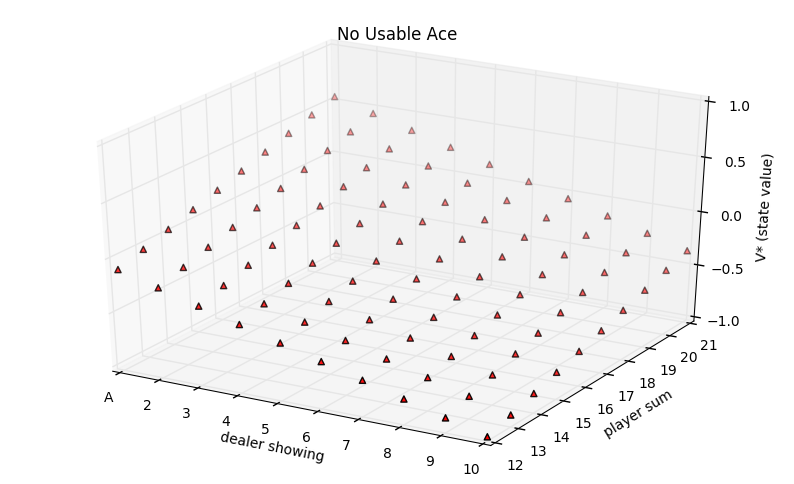

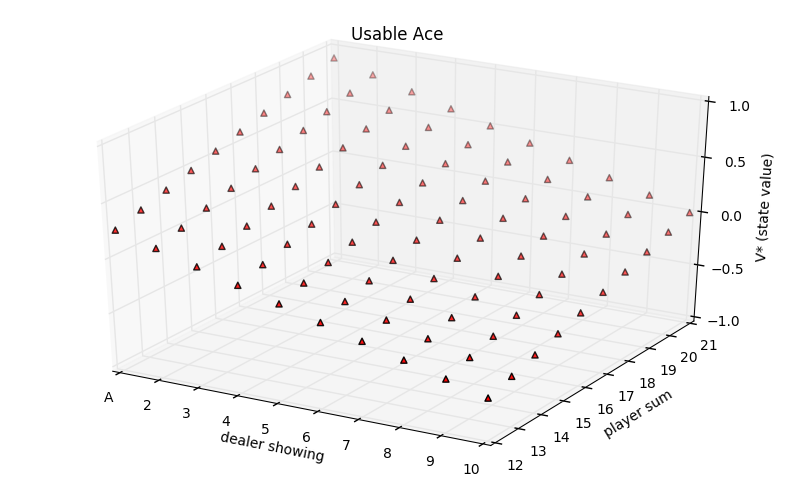

In [15]:
plot_state_data(state_values, 'scatter')

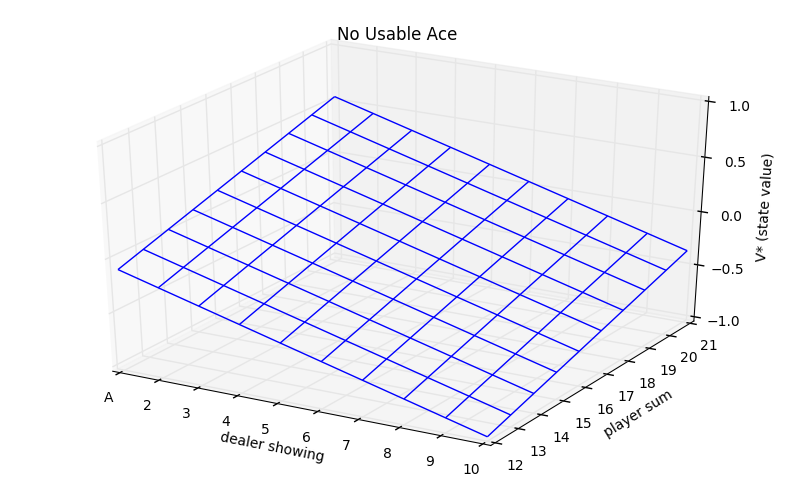

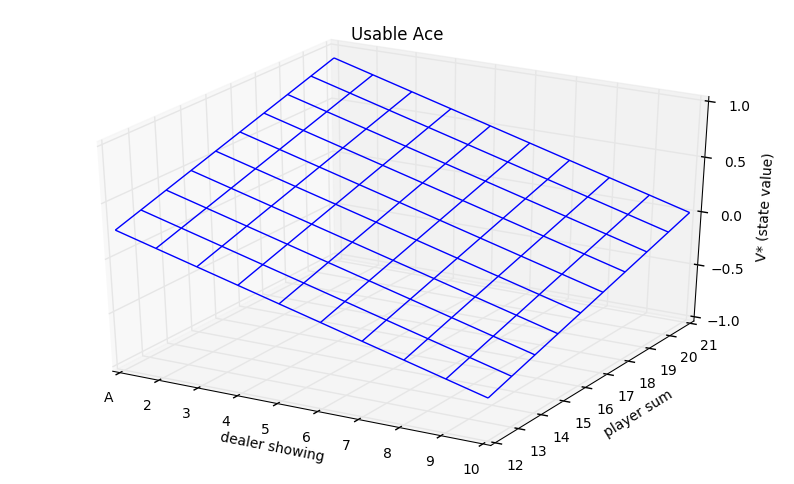

In [16]:
plot_state_data(state_values, 'wireframe')

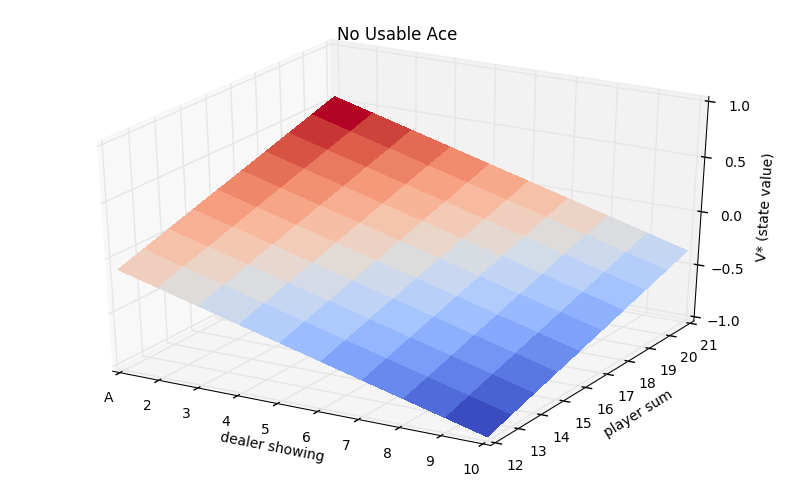

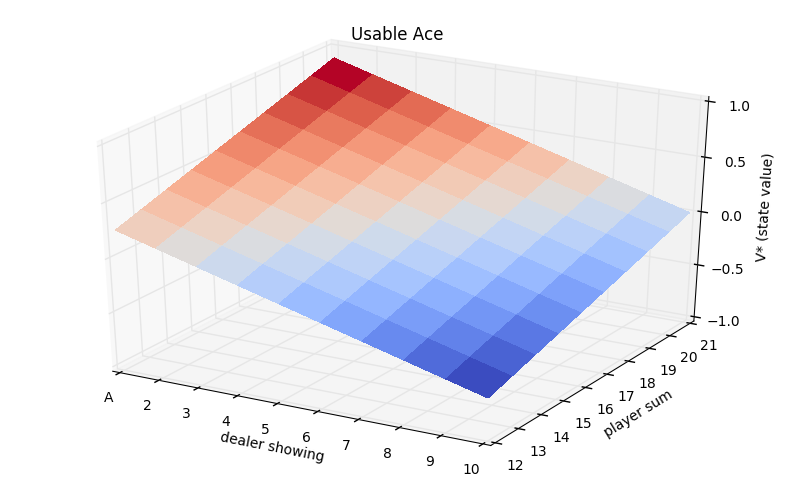

In [17]:
plot_state_data(state_values, 'surface')

# plot probabilities

    to plot a policy, just call:
        plot_state_data(policy, 'surface', (0, 1))

In [8]:
policy = generate_test_data('prob')

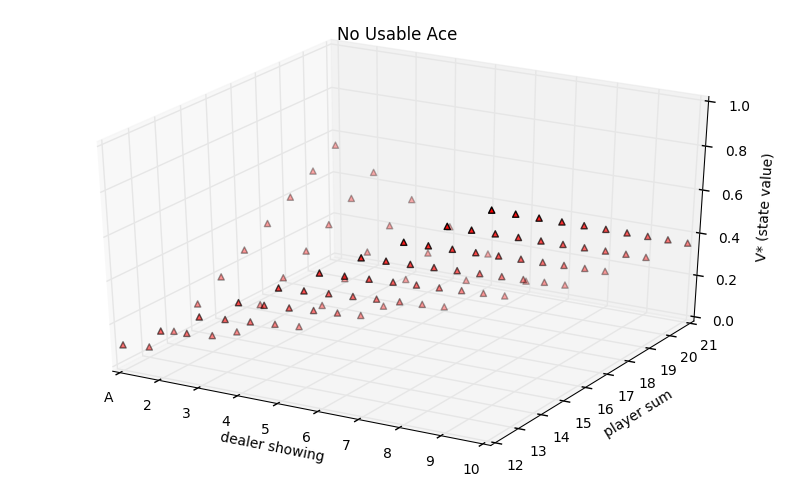

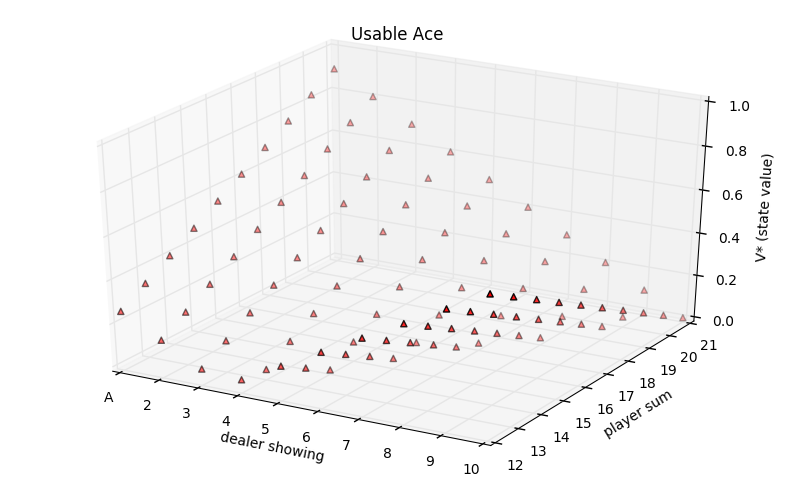

In [9]:
plot_state_data(policy, 'scatter', (0, 1))

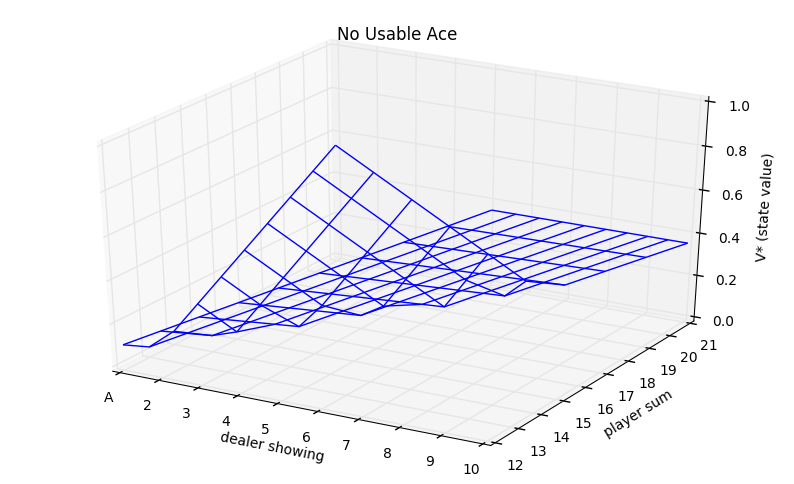

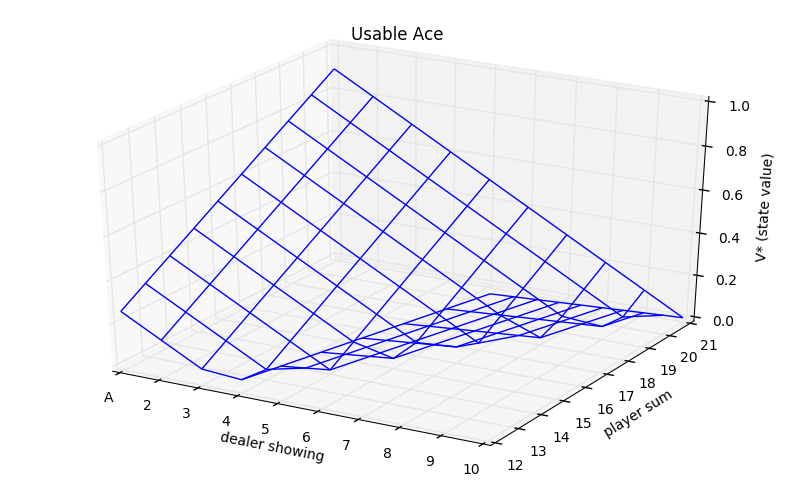

In [10]:
plot_state_data(policy, 'wireframe', (0, 1))

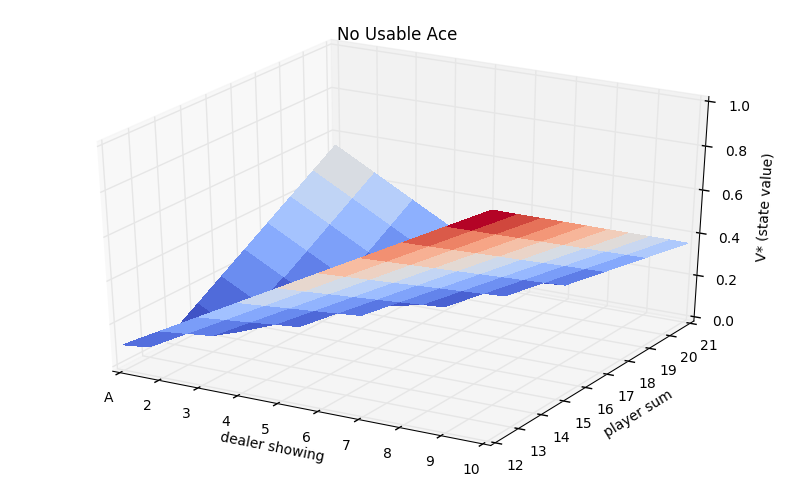

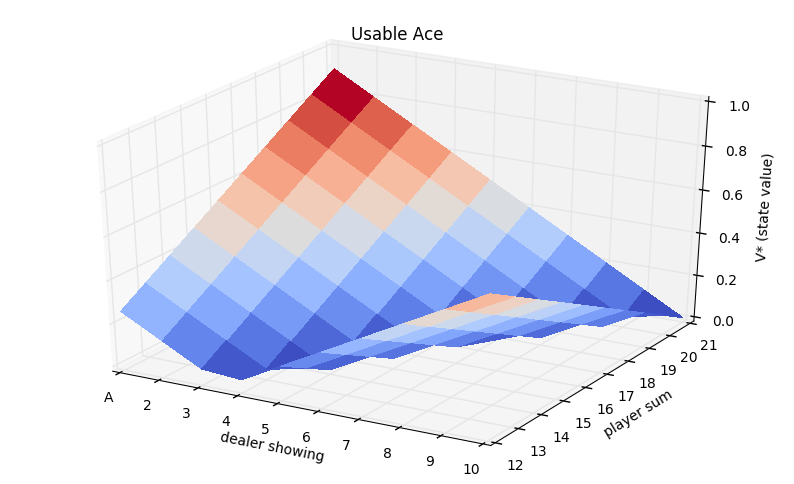

In [11]:
plot_state_data(policy, 'surface', (0, 1))